In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import inter_rater

In [135]:
workers_answers = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_answers.csv")
workers_questionnaire = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_questionnaire.csv")
workers_dimensions_selection = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_dimensions_selection.csv")


In [123]:
workers_answers

Age = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Age"]
absolute_frequencies_Age = Age['question_answer_text'].value_counts()
relative_frequencies_Age = absolute_frequencies_Age / len(Age)
print(relative_frequencies_Age)

Gender = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gender"]
absolute_frequencies_Gender = Gender['question_answer_text'].value_counts()
relative_frequencies_Gender = absolute_frequencies_Gender / len(Gender)
print(relative_frequencies_Gender)

Gaming_Frequency = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gaming Frequency"]
absolute_frequencies_Gaming_Frequency = Gaming_Frequency['question_answer_text'].value_counts()
relative_frequencies_Gaming_Frequency = absolute_frequencies_Gaming_Frequency / len(Gaming_Frequency)
print(relative_frequencies_Gaming_Frequency)

Write_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Reliance on Reviews"]
absolute_frequencies_Write_Reviews = Write_Reviews['question_answer_text'].value_counts()
relative_frequencies_Write_Reviews = absolute_frequencies_Write_Reviews / len(Write_Reviews)
print(relative_frequencies_Write_Reviews)

Trust_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Trust in Reviews"]
absolute_frequencies_Trust_Reviews = Trust_Reviews['question_answer_text'].value_counts()
relative_frequencies_Trust_Reviews = absolute_frequencies_Trust_Reviews / len(Trust_Reviews)
print(relative_frequencies_Trust_Reviews)

question_answer_text
18-24    0.933333
25-34    0.066667
Name: count, dtype: float64
question_answer_text
Male      0.8
Female    0.2
Name: count, dtype: float64
question_answer_text
A few times a week    0.466667
Never                 0.200000
Rarely                0.200000
Once a month          0.066667
Every day             0.066667
Name: count, dtype: float64
question_answer_text
Rarely (for 20% of products)                     0.666667
Occasionally (for 50% of products)               0.133333
Never (I'm not interested in writing reviews)    0.133333
Often (for 80% of products)                      0.066667
Name: count, dtype: float64
question_answer_text
Quite inclined (yes, they influence my purchase decision)    0.533333
Very inclined (yes, I decisively base my choices)            0.266667
Moderately inclined (yes, I consider them but not only)      0.133333
Not very inclined (no, I consider other factors)             0.066667
Name: count, dtype: float64


In [124]:
absolute_frequencies = workers_questionnaire['question_answer_text'].value_counts()
relative_frequencies = absolute_frequencies / len(workers_questionnaire)

average_confidence = workers_answers.groupby('document_index')['Confidence_value'].mean()
average_time_elapsed = workers_answers.groupby('document_index')['time_elapsed'].mean()

In [125]:
#da verificare
total_units = len(workers_answers)
matching_units = workers_answers[workers_answers['Reliability_value'] == workers_answers['Reliability_value']].shape[0]

percent_agreement = (matching_units / total_units) * 100

In [126]:
# Inizializza una lista per i risultati
result_list = []

# Cicla sui valori unici della colonna document_id
for doc_id in workers_answers['document_id'].unique():
    # Filtra il DataFrame per il documento corrente
    doc_df = workers_answers[workers_answers['document_id'] == doc_id]

    # Conserva solo la prima risposta per ogni worker_id
    unique_worker_ids = doc_df['worker_id'].unique()
    for worker_id in unique_worker_ids:
        first_answer_idx = doc_df[doc_df['worker_id'] == worker_id].index[0]
        first_answer_row = doc_df.loc[first_answer_idx]
        result_list.append({'document_id': doc_id, 'Neutrality_index': first_answer_row['Neutrality_index']})

# Crea un DataFrame dai risultati
result_df = pd.DataFrame(result_list)
#print(result_df)# Visualizza il DataFrame risultante
print(result_df)

# Raggruppa per document_id e calcola la percentuale di accordo
grouped_df = result_df.groupby('document_id')['Neutrality_index'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Visualizza il DataFrame risultante
#print(grouped_df)

   document_id  Neutrality_index
0   B00PNVOBTC               4.0
1   B00PNVOBTC               3.0
2   B00PNVOBTC               4.0
3   B00PNVOBTC               2.0
4   B00PNVOBTC               3.0
..         ...               ...
70  B00QTSR5GO               4.0
71  B00QTSR5GO               3.0
72  B00QTSR5GO               4.0
73  B00QTSR5GO               3.0
74  B00QTSR5GO               2.0

[75 rows x 2 columns]


In [127]:
grouped_df = result_df.groupby(['document_id', 'Neutrality_index']).size().reset_index(name='counts')

# Crea un DataFrame pivot per avere le Neutrality_description come colonne
pivot_df = grouped_df.pivot(index='document_id', columns='Neutrality_index', values='counts').fillna(0)

# Calcola la percentuale di accordo per ciascun document_id
total_documents = pivot_df.shape[0]
matching_values = pivot_df.apply(lambda row: row.max(), axis=1)
percent_agreement = (matching_values / total_documents) * 100

# Visualizza il DataFrame risultante con la percentuale di accordo per ciascun document_id
result_percent_df = pd.DataFrame({'document_id': percent_agreement.index, 'Percent_Agreement': percent_agreement.values})

print(result_percent_df)

   document_id  Percent_Agreement
0   B00004SVUZ          26.666667
1   B00006JN5L          20.000000
2   B0001DHQPI          13.333333
3   B0002KMHD6          26.666667
4   B000O39U3Q          13.333333
5   B001DYVHY0          13.333333
6   B0029MAXR2          13.333333
7   B003TO59D2          13.333333
8   B0041RUM0Q          20.000000
9   B0050SYWGU          20.000000
10  B005ZNWT4C          26.666667
11  B00PNVOBTC          13.333333
12  B00QTSR5GO          13.333333
13  B015XC3B46          26.666667
14  B01G6LXXWI          13.333333


In [139]:
workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])

# Itera su ciascun worker_id
for worker_id in workers_answers['worker_id'].unique():
    # Filtra le righe relative al worker_id corrente
    worker_df = workers_answers[workers_answers['worker_id'] == worker_id]

    # Trova i document_id duplicati con il time_submit_parsed più basso
    duplicate_rows = worker_df[worker_df.duplicated(subset=['document_id'], keep='last')]

    # Ottieni gli indici delle righe da eliminare
    rows_to_drop = duplicate_rows.index

    # Elimina le righe non necessarie
    workers_answers = workers_answers.drop(rows_to_drop)








/var/folders/4l/y4hbjt2s5tj88m9nnzs8x9qw0000gn/T/ipykernel_58640/2951671747.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])


In [144]:

selected_columns = ["document_id", "worker_id", "Neutrality_value"]
df_selected = workers_answers[selected_columns]

# Utilizzare pivot per trasformare i dati
workers_task = df_selected.pivot(index="worker_id", columns="document_id", values="Neutrality_value")
workers_task





KeyError: 'value'

In [159]:

selected_columns = ["document_id", "Neutrality_value"]
df_selected = workers_answers[selected_columns]

df_selected.columns.name = None
# Usa la funzione pivot_table per ottenere la tabella desiderata con il conteggio degli elementi uguali
pivot_table = pd.pivot_table(df_selected, index='document_id', columns='Neutrality_value', aggfunc='size', fill_value=0)

print(pivot_table)


Neutrality_value  -2.0  -1.0   0.0   1.0   2.0
document_id                                   
B00004SVUZ           0     0     1     4     0
B00006JN5L           3     0     2     0     0
B0001DHQPI           1     2     0     2     0
B0002KMHD6           0     0     1     4     0
B000O39U3Q           1     1     0     2     1
B001DYVHY0           0     1     0     2     2
B0029MAXR2           0     2     1     2     0
B003TO59D2           2     2     0     0     1
B0041RUM0Q           0     0     0     3     2
B0050SYWGU           0     0     1     3     1
B005ZNWT4C           4     0     0     1     0
B00PNVOBTC           0     0     1     2     2
B00QTSR5GO           0     0     1     2     2
B015XC3B46           0     1     0     4     0
B01G6LXXWI           1     0     1     2     1


             Neutrality_value
document_id                  
B00004SVUZ                  2
B00006JN5L                  2
B0001DHQPI                  3
B0002KMHD6                  2
B000O39U3Q                  4
B001DYVHY0                  3
B0029MAXR2                  3
B003TO59D2                  3
B0041RUM0Q                  2
B0050SYWGU                  3
B005ZNWT4C                  2
B00PNVOBTC                  3
B00QTSR5GO                  3
B015XC3B46                  2
B01G6LXXWI                  4


0.07305433186490445

In [161]:
def checkInput(rate, n):
    """
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer"
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"

def fleissKappa(rate,n):
    """
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)

    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)

    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)

    return kappa

In [162]:
from statsmodels.stats.inter_rater import fleiss_kappa

selected_columns = ["document_id", "Neutrality_value"]
df_selected = workers_answers[selected_columns]

df_selected.columns.name = None
# Usa la funzione pivot_table per ottenere la tabella desiderata con il conteggio degli elementi uguali
pivot_table = pd.pivot_table(df_selected, index='document_id', columns='Neutrality_value', aggfunc='size', fill_value=0)

#calcolo fleiss_kappa
risultato = fleiss_kappa(pivot_table)
risultato2 = fleissKappa(pivot_table,5)
display(risultato2)

#raters =  5 , #subjects =  15 , #categories =  15


KeyError: 3

In [122]:
from statsmodels.stats.inter_rater import fleiss_kappa

rate = [
    [np.nan, 1, 5, 2],
    [2,  np.nan, 5, 1],
    [1, 5, 2, np.nan]
]

risultato = fleiss_kappa(rate)
display(risultato)


AssertionError: 

In [115]:
fleissKappa(workers_task, 15)

KeyError: 0

In [131]:
time_media = workers_answers[['worker_id', 'document_id', 'time_start', 'time_end']]
time_media = time_media.copy()
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)
display(time_media)

,worker_id,document_id,time_spedn
0,1ONCOX6OYV8XZJ,B00PNVOBTC,112.39
1,1ONCOX6OYV8XZJ,B0050SYWGU,177.34
2,1ONCOX6OYV8XZJ,B0041RUM0Q,353.43
5,1ONCOX6OYV8XZJ,B005ZNWT4C,103.12
6,1ONCOX6OYV8XZJ,B015XC3B46,10.51
...,...,...,...
87,T4MEORG9STZITP,B0002KMHD6,447.40
90,T4MEORG9STZITP,B015XC3B46,125.06
91,T4MEORG9STZITP,B00PNVOBTC,125.46
92,T4MEORG9STZITP,B0041RUM0Q,119.69


In [132]:

#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('worker_id')['time_spedn'].mean()
display(tempo_medio_W)

#Calcoliamo il tempo medio per documento
tempo_medio_D = time_media.groupby('document_id')['time_spedn'].mean()
display(tempo_medio_D)




worker_id
1ONCOX6OYV8XZJ    151.358
7GFH0CXPHPTSPX    118.648
B0ARNFCRSNEXAS    153.752
B3QHTCHNCMXQ4H     81.260
CNZQBVRXLWYZG8    125.464
DLNY6ZIJOABZLJ    207.452
HAA3KNPKCB5DSG    844.542
ISGHMQO0AXKFXS    125.638
IZ2TQI5OCUGD1N    289.696
JLVBHXOL0E65XT    121.256
KWJ2MEMELZHTD1    156.132
L292E0RLKG4B7U    218.028
MXLX3Z0LDZTDTY    451.120
OMLUXZWFN4LV8O    344.378
T4MEORG9STZITP    187.086
Name: time_spedn, dtype: float64

document_id
B00004SVUZ    207.062
B00006JN5L     74.638
B0001DHQPI    396.858
B0002KMHD6    254.228
B000O39U3Q    134.906
B001DYVHY0    139.556
B0029MAXR2    225.012
B003TO59D2    226.472
B0041RUM0Q    227.638
B0050SYWGU    143.640
B005ZNWT4C    917.124
B00PNVOBTC    183.056
B00QTSR5GO    128.616
B015XC3B46     72.586
B01G6LXXWI    244.418
Name: time_spedn, dtype: float64

In [133]:
# vado a selezionare solo le colonne che voglio
selected_columns = ['worker_id','document_id', 'selection_value']

# Crea un nuovo dataframe includendo solo le colonne selezionate
dimensions_selections = workers_dimensions_selection[selected_columns].copy()

#media valutazione data per ogni documento, ( slider )
media_valutazioni_D = dimensions_selections.groupby('document_id')['selection_value'].mean()
display(media_valutazioni_D)

#media valutazione data per ogni documento, da ogni worker, ( slider )
media_valutazioni_W = dimensions_selections.groupby('worker_id')['selection_value'].mean()
display(media_valutazioni_W)

document_id
B00004SVUZ    49.431818
B00006JN5L    39.500000
B0001DHQPI    75.833333
B0002KMHD6    42.166667
B000O39U3Q    80.400000
B001DYVHY0    78.428571
B0029MAXR2    76.000000
B003TO59D2    33.250000
B0041RUM0Q    69.194805
B0050SYWGU    79.888889
B005ZNWT4C    85.875000
B00PNVOBTC    66.666667
B00QTSR5GO    86.000000
B015XC3B46    66.411765
B01G6LXXWI    56.125000
Name: selection_value, dtype: float64

worker_id
1ONCOX6OYV8XZJ    83.687500
7GFH0CXPHPTSPX    58.800000
B0ARNFCRSNEXAS    69.142857
B3QHTCHNCMXQ4H    85.000000
CNZQBVRXLWYZG8    87.142857
DLNY6ZIJOABZLJ    54.000000
HAA3KNPKCB5DSG    92.500000
ISGHMQO0AXKFXS    67.000000
IZ2TQI5OCUGD1N    94.111111
JLVBHXOL0E65XT    65.571429
KWJ2MEMELZHTD1    44.560440
L292E0RLKG4B7U    48.875000
MXLX3Z0LDZTDTY    80.000000
OMLUXZWFN4LV8O    30.566667
T4MEORG9STZITP    63.875000
Name: selection_value, dtype: float64

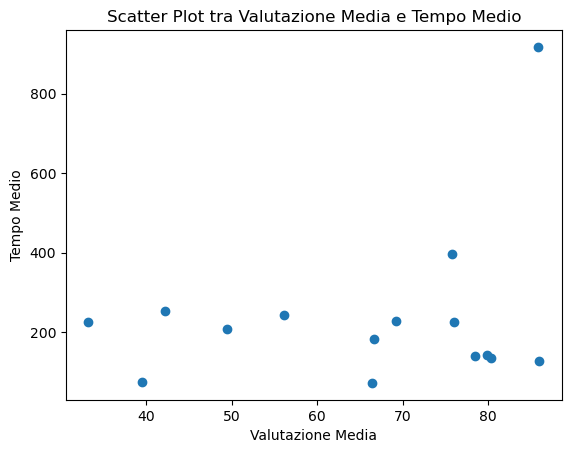

,valutazione_media,tempo_medio
document_id,,
B00004SVUZ,49.431818,207.062
B00006JN5L,39.500000,74.638
B0001DHQPI,75.833333,396.858
B0002KMHD6,42.166667,254.228
B000O39U3Q,80.400000,134.906
B001DYVHY0,78.428571,139.556
B0029MAXR2,76.000000,225.012
B003TO59D2,33.250000,226.472
B0041RUM0Q,69.194805,227.638


In [134]:
import pandas as pd
import matplotlib.pyplot as plt

#unisco i due dataframe per avere valutazione medi e tempo medio per ogni docuemnto
merged_dataset = pd.merge(media_valutazioni_D, tempo_medio_D, on='document_id')

merged_dataset = merged_dataset.rename(columns={'selection_value': 'valutazione_media',
                                                'time_spedn': 'tempo_medio'})

# Crea il grafico
plt.scatter(merged_dataset['valutazione_media'], merged_dataset['tempo_medio'])
plt.xlabel('Valutazione Media')
plt.ylabel('Tempo Medio')
plt.title('Scatter Plot tra Valutazione Media e Tempo Medio')
plt.show()

'''
Un'analisi può esser che non si notano correlazioni con tempo e valutazione, nel senso che una valutazione alta non equivale a un tempo medio elevato di rispota,
anche se poteva esser cosi perche per avere una valutazione alta, la recensione deve essere molto prolissa e ben sturitturata, quindi ci vuoleva mooto tempo ma non  e coi.
'''


display(merged_dataset)